# Computing Dispersal Kernels

<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#000000; border-left: solid #000000 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Objective: </b> Compute dispersal kernel using the file produced with OpenDrift </p>
<p style='margin-left:1em;'>
A dispersal kernel is an application of a probability density function that, when integrated across a specific range of distances, describes the probability of settlement relative to the source.
</p>
<p style='margin-left:1em;'>
Dec - 2023 | Mireya M. Montano | mireya.mmor@gmail.com
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>

## Parameters needed

- file_list (str) List of OpenDrift files to analyse
- outdir (str) path of the directory where to save the output
- id (str) Unique identifier for the experiment. i.e. 'control', 'no_stranding', 'ns' 
- predominant_direction (str) Predominant direction to define the positive and negative values relative to the release location. Options: 'horizontal', 'vertical'. The Bay of Plenty experiment is done using 'horizontal' direction.

## Optional Parameters
- xmin (int) minimum value for the distribution. If not provided the script will calculate the minimum value available
- xmax (int) maximum value for the distribution. If not provided the script will calculate the maximum value available
- bins (int) Number of bins for the gaussian distribution

Usually dispersal kernels identify where the particles are settled regardless of the time, however if the user is interested in a defined amount of time there's two parameters that can be added
- time_of_interest (int) Time at which the user wants to calculate the dispersal kernel.
- time_of_interest_units (str) Units of the time of interest defined previously. i.e. 'D' for days, 'H' for hours

In [1]:
from glob import glob

file_list = sorted(glob("data/notebook_02/*01_Particles_40_nb.nc"))
outdir = "output/notebook_03"
id = "control"
predominant_direction = "horizontal"
xmin = -200
xmax = 200
bins = 50

In [2]:
from Lagrangian_Analyses.get_dispersal_kernel import get_dispersal_kernel

DK = get_dispersal_kernel(
    file_list=file_list,
    outdir=outdir,
    id=id,
    predominant_direction=predominant_direction,
    xmin=xmin,
    xmax=xmax,
    bins=bins,
)

DK.run()

INFO:root:--- Creating output directory


--- Generating output directory
--- Analysing data/notebook_02/201001_Particles_40_nb.nc
--- Analysing data/notebook_02/201101_Particles_40_nb.nc
--- Analysing data/notebook_02/201201_Particles_40_nb.nc
--- Analysing data/notebook_02/201301_Particles_40_nb.nc
--- Analysing data/notebook_02/201401_Particles_40_nb.nc
--- Analysing data/notebook_02/201501_Particles_40_nb.nc
--- Analysing data/notebook_02/201601_Particles_40_nb.nc
--- Analysing data/notebook_02/201701_Particles_40_nb.nc
--- Analysing data/notebook_02/201801_Particles_40_nb.nc
--- Analysing data/notebook_02/201901_Particles_40_nb.nc
--- Analysing data/notebook_02/202001_Particles_40_nb.nc
--- Calculating Gaussian Dispersal Kernel
--- Saving to output/notebook_03/KDE_control.p
--- Done


## Plotting Dispersal Kernel
The above returns a pickle file containing a dictionary with an item per location that includes the x and y values for the Gaussian Dispersal Kernel. Therefore we can plot the dispersal kernel for each release location as follows.



(0.0, 0.1)

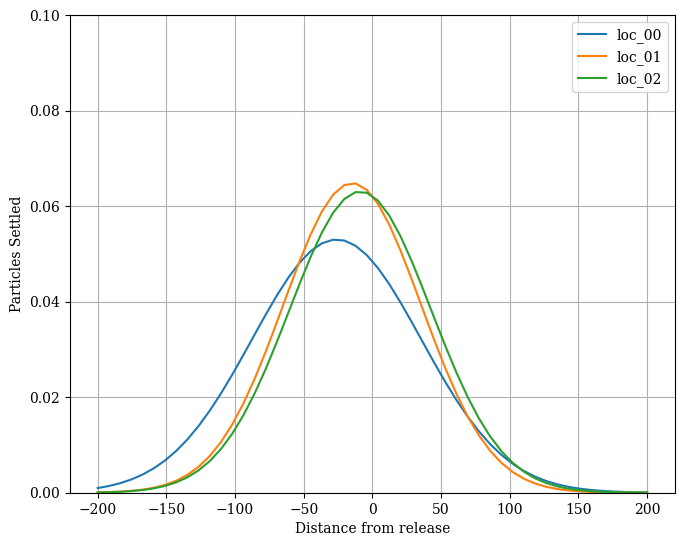

In [7]:
import pickle
from Lagrangian_Analyses.utils import *
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

GDK_dict = pickle.load(open(f"{outdir}/GDK_{id}.p", "rb"))

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(1, 1, 1)

for location, items in GDK_dict.items():
    x = items["x"]
    y = items["y"]
    ax.plot(x, y, label=location)

ax.set_ylabel("Particles Settled")
ax.set_xlabel("Distance from release")
ax.grid()
ax.legend()
ax.set_ylim(0, 0.1)